In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
def smoothen(waypoints):
    optimumpointlist = []
    i = 0
    range_factor = 6
    avg_factor = 2 * range_factor + 1
    num_of_waypoints = len(waypoints)

    for point in waypoints:
        counter = 0
        estimated_x_cord = point[0]
        estimated_y_cord = point[1]
        while counter < range_factor:
            estimated_x_cord += waypoints[(i + (counter + 1)) % num_of_waypoints][0]
            estimated_x_cord += waypoints[(i - (counter + 1)) % num_of_waypoints][0]

            estimated_y_cord += waypoints[(i + (counter + 1)) % num_of_waypoints][1]
            estimated_y_cord += waypoints[(i - (counter + 1)) % num_of_waypoints][1]
            counter += 1

        estimated_x_cord = estimated_x_cord / avg_factor
        estimated_y_cord = estimated_y_cord / avg_factor


        optimumpointlist.append(np.array( (estimated_x_cord, estimated_y_cord) ))

        i += 1
    return np.array(optimumpointlist)

In [3]:
def calc_distance(prev_point, next_point):
    delta_x = next_point[0] - prev_point[0]
    delta_y = next_point[1] - prev_point[1]
    return math.hypot(delta_x, delta_y)

def smooth_central_line(center_line, max_offset, pp=0.10, p=0.05, c=0.70, n=0.05, nn=0.10, iterations=72, skip_step=1):
    if max_offset < 0.0001:
        return center_line
    if skip_step < 1:
        skip_step = 1
    smoothed_line = center_line
    for i in range(0, iterations):
        smoothed_line = smooth_central_line_internal(center_line, max_offset, smoothed_line, pp, p, c, n, nn, skip_step)
    return smoothed_line


def smooth_central_line_internal(center_line, max_offset, smoothed_line, pp, p, c, n, nn, skip_step):
    length = len(center_line)
    new_line = [[0.0 for _ in range(2)] for _ in range(length)]
    for i in range(0, length):
        wpp = smoothed_line[(i - 2 * skip_step + length) % length]
        wp = smoothed_line[(i - skip_step + length) % length]
        wc = smoothed_line[i]
        wn = smoothed_line[(i + skip_step) % length]
        wnn = smoothed_line[(i + 2 * skip_step) % length]
        new_line[i][0] = pp * wpp[0] + p * wp[0] + c * wc[0] + n * wn[0] + nn * wnn[0]
        new_line[i][1] = pp * wpp[1] + p * wp[1] + c * wc[1] + n * wn[1] + nn * wnn[1]
        while calc_distance(new_line[i], center_line[i]) >= max_offset:
            new_line[i][0] = (0.98 * new_line[i][0]) + (0.02 * center_line[i][0])
            new_line[i][1] = (0.98 * new_line[i][1]) + (0.02 * center_line[i][1])
    return new_line

In [4]:
TRACK_NAME = 'C:/Users/suraj/projects/deepracer24/2022_may_open_ccw.npy'

# Load the center, inner, outer waypoints
waypoints = np.load(TRACK_NAME)

center_line = waypoints[:,0:2]
inner_border = waypoints[:,2:4]
outer_border = waypoints[:,4:6]

In [5]:
# smooth_path = smoothen(center_line)
smooth_path = smooth_central_line( center_line, 1.066*0.85*0.5,skip_step=1 )
smooth_path = np.array( [ np.array(point) for point in smooth_path ] )

In [6]:
1.066*0.85*0.5

0.45305

In [7]:
smooth_path.shape

(156, 2)

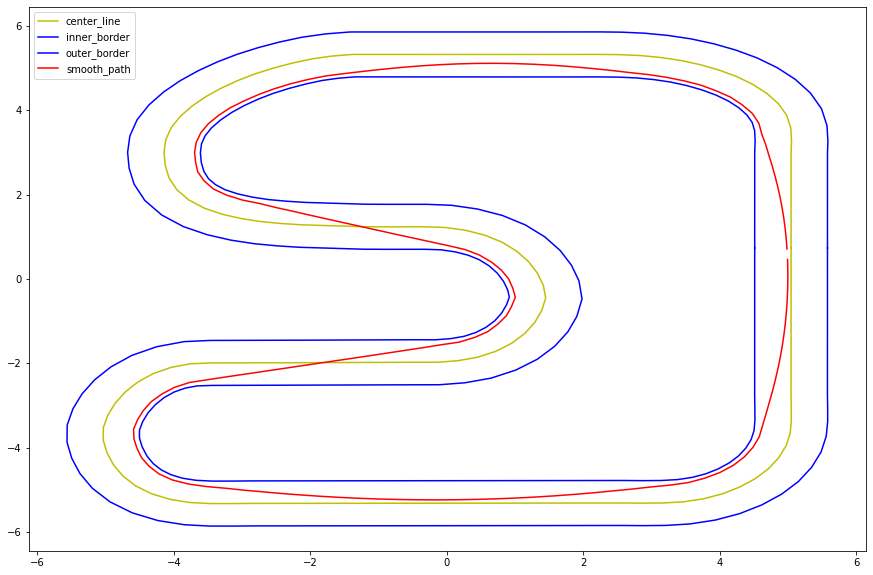

In [8]:
plt.plot(center_line[:,0], center_line[:,1], label = 'center_line', c = 'y')
plt.plot(inner_border[:,0], inner_border[:,1], label = 'inner_border', c = 'b')
plt.plot(outer_border[:,0], outer_border[:,1], label = 'outer_border', c = 'b')
plt.plot(smooth_path[:,0], smooth_path[:,1], label = 'smooth_path', c = 'r')
plt.legend()
plt.show()

In [9]:
import math

def angle(p1, p2):
    """
    """
    dy = p2[1]-p1[1]
    dx = p2[0]-p1[0]
    return math.degrees(math.atan2(dy,dx))

def normalize_angle_to_360(angle):
    if angle < 0:
        return 360 + angle
    return angle

In [10]:
x1, y1 = 0, 0
x2, y2 = 0, -1

In [11]:
normalize_angle_to_360( angle((x1,y1), (x2,y2)) )

270.0

In [12]:
from scipy import signal
def up_sample(waypoints, factor):
    """
    Adds extra waypoints in between provided waypoints
    :param waypoints:
    :param factor: integer. E.g. 3 means that the resulting list has 3 times as many points.
    :return:
    """
    return np.array( list( signal.resample(np.array(waypoints), len(waypoints) * factor) ) )

In [13]:
center_line[:10]

array([[5.04771315, 0.73385354],
       [5.04770565, 0.86385354],
       [5.04769568, 0.99385354],
       [5.04768252, 1.1654985 ],
       [5.04763508, 1.46714252],
       [5.04763794, 1.76878798],
       [5.04779196, 2.07043898],
       [5.0475924 , 2.37207794],
       [5.04653549, 2.67368758],
       [5.047997  , 2.97538257]])

In [14]:
up_sample(center_line, 10).shape

(1560, 2)

In [15]:
smoothen(up_sample(center_line, 10)).shape

(1560, 2)

In [16]:
center_line.shape

(156, 2)

In [17]:
def distanceFromLine(p1, p2, p3):
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3

    a = y1-y2
    b = x2-x1
    c = (x1-x2)*y1 + (y2-y1)*x1

    distance = abs( a*x3 + b*y3 + c )/math.sqrt( a**2 + b**2 )
    return distance

In [18]:
p1 = (0,1)
p2 = (1,0)
p3 = (0,0)

In [19]:
distanceFromLine(p1, p2, p3)

0.7071067811865475